# Second Level Analysis 
Shout out to Emma Risgaard Olsen and Sirid Wihlborg. This notebook was modified from their code which can be found on GitHub (https://github.com/emmarisgaardolsen/BSc_project_fMRI/blob/main/fmri_analysis_scripts/second_level.ipynb).


In [3]:
import pickle
import glob
import os
import numpy as np
import pandas as pd
import glob
from nilearn import plotting
from atlasreader import create_output
from pathlib import Path

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

## Load first level models

Load the first level models generated by the `fit_first_level.py` script

In [11]:
path_to_first_level = Path("/work/LauraBockPaulsen#1941/fMRI_analysis/flms")
flm_files = [f for f in path_to_first_level.iterdir() if f.is_file()]

flms = []

for model in flm_files: # looping over the flms and loading them
    flm_model = pickle.load(open(model,'rb')) 
    flms.append(flm_model)

## Create second level model

In [5]:
from nilearn.glm.second_level import SecondLevelModel

### 2.1. METHOD 1 for fitting 2nd level model
THIS WHOLE DESCRIPTION IS FROM EMMA AND SIRID! Thanks girls <3To be modified!!!


This is the method where we use fitted `FirstlevelModel` objects as inputs. 
This method is quite efficient (in terms of code), because it assumes that you are only interested in an intercept-only group-level model (i.e., the average of a particular first-level contrast across participants), and you can leave out the second-level design matrix. 


The `smoothing_fwhm` argument: specifies the full-width at half-maximum (FWHM) of the Gaussian smoothing kernel to be applied to the data. This smoothing is applied to the data at the second level of analysis, after the first-level model has been fit to each individual subject's data. The purpose of smoothing the data at the second level is to increase the signal-to-noise ratio (SNR) of the data, which can improve the reliability and sensitivity of the results. It can also help to reduce the effects of spatial noise and other sources of variability in the data. The FWHM value specifies the size of the smoothing kernel, with larger values corresponding to more aggressive smoothing. In general, it is recommended to use a conservative smoothing kernel with a FWHM value of around 4-8 millimeters, although the optimal value will depend on the specific data and the goals of the analysis. Overall, the smoothing_fwhm argument in the SecondLevelModel function allows users to control the amount of smoothing applied to the data at the second level of analysis, which can help to improve the reliability and interpretability of the results.

In [6]:
slm_method1 = SecondLevelModel(smoothing_fwhm=8.0)
slm_method1.fit(flms)

/work/LauraBockPaulsen#1941/fMRI_analysis/env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:799: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f"One contrast given, assuming it for all {int(n_runs)} runs")


SecondLevelModel(smoothing_fwhm=8.0)

## Compute contrasts

## Button vs negative

In [17]:
from nilearn.glm import threshold_stats_img

In [18]:
zmaps_but_neg = slm_method1.compute_contrast(first_level_contrast='IMG_button - negative', output_type='z_score') # avg (across participants) group-lvl contrast of "emotional" - neutral

thresholded_map_but_neg, threshold_but_neg = threshold_stats_img(
    zmaps_but_neg, 
    alpha=.05, 
    height_control='bonferroni') 
    
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold_but_neg)

/work/LauraBockPaulsen#1941/fMRI_analysis/env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:799: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f"One contrast given, assuming it for all {int(n_runs)} runs")


The p<.05 Bonferroni-corrected threshold is 5.04


/tmp/ipykernel_20136/2873647937.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plot_abs=False, cmap=matplotlib.cm.get_cmap('PiYG_r'))


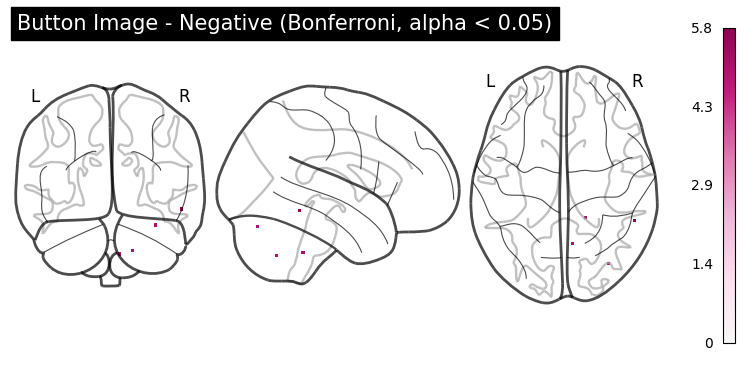

In [19]:
plotting.plot_glass_brain(thresholded_map_but_neg, colorbar=True,
                          title="Button Image - Negative (Bonferroni, alpha < 0.05)",
                          plot_abs=False, cmap=matplotlib.cm.get_cmap('PiYG_r'))
plotting.show()

## Positive vs negative

In [ ]:
zmaps_pos_neg = slm_method1.compute_contrast(first_level_contrast='positive - negative', output_type='z_score')

from nilearn.glm import threshold_stats_img

thresholded_map_pos_neg, threshold_pos_neg = threshold_stats_img(
    zmaps_pos_neg, 
    alpha=.05, 
    height_control='bonferroni') 
    
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold_pos_neg)


The p<.05 Bonferroni-corrected threshold is 5.04


/work/LauraBockPaulsen#1941/fMRI_analysis/env/lib/python3.10/site-packages/nilearn/_utils/param_validation.py:72: UserWarning: The given float value must not exceed 4.499705700157307. But, you have given threshold=5.036853246874029.
  warnings.warn(


/tmp/ipykernel_16384/3617599336.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plot_abs=False, cmap=matplotlib.cm.get_cmap('PiYG_r'))


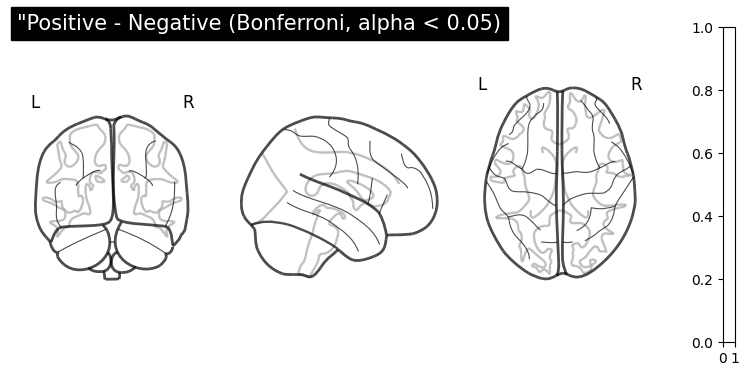

In [ ]:
plotting.plot_glass_brain(thresholded_map_pos_neg, colorbar=True,
                          title='"Positive - Negative (Bonferroni, alpha < 0.05)",
                          plot_abs=False, cmap=matplotlib.cm.get_cmap('PiYG_r'))
plotting.show()

In [ ]:
from nilearn.plotting import plot_stat_map

# the auto parameter means that the function determines the threshold "magically by analysis of the img: https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_stat_map.html"

plot_stat_map(thresholded_map_pos_neg, cmap='PiYG_r',threshold='auto', cut_coords=[-30,-20,-10,0,5,10,15],
              display_mode='z',  black_bg=False,
              title=None) 

NameError: name 'thresholded_map2_ps_ns' is not defined

# LAURA REACHED THIS POINT! THE REST OF THE NOTEBOOK IS NOT MODIFIED FROM ORIGINAL VERISON BY SIRID AND EMMA
Also have a look at mikkels 10_Nilearn_fMRI_stats.ipynb notebook!

## 6. Visualise and investigate clusters using AtlasReader

In this step we'll use `Atlasreader` to both get information about the clusters but also visuale the zmaps.   
See the github https://github.com/miykael/atlasreader to get information about the function!  
They provide this example noteboook (https://github.com/miykael/atlasreader/blob/master/notebooks/atlasreader.ipynb) where all parameters are explained and examplified!

In [ ]:
outdir = 'atlasreader_results' # directory where output is stored
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [ ]:
######### Using the create_coutput() function ############

# Emotional - Neutral: creating output using "thresholded_map3_emoneu"
create_output(
    filename = thresholded_map3_emoneu,
    cluster_extent = 5, 
    atlas='default',
    voxel_thresh=1.96, 
    direction='both',
    outdir=os.path.join(outdir, 'results_emoneu')
)

**Investigate the clusters:**

Here we import the output that we've created using the create_output function

In [ ]:
# Emotional - Neutral
peak_info_emoneu = pd.read_csv(os.path.join(outdir, 'results_emoneu', 'atlasreader_peaks.csv'))
display(peak_info_emoneu.head(5))

cluster_info_emoneu = pd.read_csv(os.path.join(outdir, 'results_emoneu', 'atlasreader_clusters.csv'))
display(cluster_info_emoneu.head(5))

**Visualising Clusters:**

In [ ]:
# Emotional - Neutral

# figure size in inches optional
rcParams['figure.figsize'] = 10,5

# read images
img_A = mpimg.imread(os.path.join(outdir, 'results_emoneu', 'atlasreader.png'))
img_B = mpimg.imread(os.path.join(outdir, 'results_emoneu', 'atlasreader_cluster01.png'))

# display images
fig, ax = plt.subplots(2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)

## 7. Perform permutation test

**6.1 Create an image for comparison**

Next, we compute the (corrected) p-values with a parametric test to compare them with the results from a nonparametric test.

In [ ]:
import numpy as np
from nilearn.image import get_data, math_img

#Get an image of p-values
p_val = slm_method1.compute_contrast(first_level_contrast='Emotional-Neutral',output_type='p_value')
# Get the number of voxels in the image
n_voxels = np.sum(get_data(slm_method1.masker_.mask_img_))
# Making an image with significant values, correcting the p-values for multiple testing and taking negative logarithm
neg_log_pval = math_img(
    '-np.log10(np.minimum(1, img * {}))'.format(str(n_voxels)),
    img=p_val,
)

#Check image shape
print(neg_log_pval.shape)

**6.2 Perform Permutations:**

see: https://nilearn.github.io/stable/modules/generated/nilearn.glm.second_level.non_parametric_inference.html#nilearn.glm.second_level.non_parametric_inference

In [ ]:
from nilearn.glm.second_level import non_parametric_inference

# n_perm=1000 for the sake of time. Ideally, this should be 10,000, but the upper limit on permutations is 2 to the power of N.
n_perm=10000

"""
#We base the analysis on a contrast image (z-score map) from each participant
second_level_input2=[]
#Put the NIimg zmaps into a list.
for ii in range(21):
    second_level_input2.append(second_level_input[ii].zmap)
"""

fl_cons = []
for flm in flms:
    con = flm.compute_contrast('Emotional-Neutral', stat_type='t', output_type='effect_size') 
    fl_cons.append(con)

design_matrix = pd.DataFrame(
    [1] * len(fl_cons), # replaced 'len(second_level_input2)'
    columns=['intercept'],
)
#print(design_matrix)

#Calculate p-values using permutation
out_dict = non_parametric_inference(
    fl_cons, # replaced 'second_level_input2'
    design_matrix=design_matrix,
    model_intercept=True,
    n_perm=n_perm,  
    two_sided_test=False,
    smoothing_fwhm=8.0,
    n_jobs=1,
)

In [ ]:
import matplotlib.pyplot as plt
# Prepare thresholds for plotting

threshold_log = round(-np.log10(1 / 20))  # p < 0.05 
vmax = round(-np.log10(1 / n_perm)) # minimal p-value possible with the number of permuations

cut_coords = [0]

#Prepare images to plot
IMAGES = [
    neg_log_pval,
    out_dict
]
TITLES = [
    'Parametric Test',
    'Permutation Test\n(Voxel-Level Error Control)',
]

#Make loop with plots
fig, axes = plt.subplots(figsize=(8, 8), nrows=2, ncols=1)
img_counter = 0
i_row=0
for j_row in range(2):
        ax = axes[j_row]     
        plotting.plot_glass_brain(
            IMAGES[img_counter],
            colorbar=True,
            vmax=vmax,
            plot_abs=False,
            cut_coords=cut_coords,
            threshold=threshold_log,
            figure=fig,
            axes=ax,
        )

        
        ax.set_title(TITLES[img_counter])
        img_counter += 1


fig.suptitle('Group [Emotional-Neutral] contrast\n(negative log10 p-values)')
plt.show()